In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["font.size"] = 12

file_path = r"C:\Users\mayan\Desktop\Final Project\FinalProject.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None)

df1 = sheets[list(sheets.keys())[0]]
df2 = sheets[list(sheets.keys())[1]]
df3 = sheets[list(sheets.keys())[2]]

df = df2.copy()


In [119]:
print(df.info())
print(df.describe())
print(df.head())
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    40 non-null     int64 
 1   State                   40 non-null     object
 2   City                    40 non-null     object
 3   State Accident          40 non-null     int64 
 4   City Accident           40 non-null     int64 
 5   Total Accidents         40 non-null     int64 
 6   Persons Killed          40 non-null     int64 
 7   Drunken Driving         40 non-null     int64 
 8   Drunken Driving Deaths  40 non-null     int64 
 9   Wrong Side              40 non-null     int64 
 10  Wrong Side Deaths       40 non-null     int64 
 11  Mobile Usage            40 non-null     int64 
 12  Mobile Usage Deaths     40 non-null     int64 
 13  Traffic Signal          40 non-null     int64 
 14  Traffic Signal Deaths   40 non-null     int64 
 15  Year - C

In [121]:
#Insight: The dataset is well-structured with no missing values and consistent data types. It contains detailed yearly records on accidents and their causes, making it suitable for trend analysis, classification, and predictive modeling.

Correlation Matrix:
                             Year  State Accident  City Accident  \
Year                    1.000000       -0.238675      -0.250025   
State Accident         -0.238675        1.000000       0.528245   
City Accident          -0.250025        0.528245       1.000000   
Total Accidents        -0.641746        0.392783       0.773190   
Persons Killed          0.356464        0.208873       0.609303   
Drunken Driving        -0.869929        0.354017       0.612205   
Drunken Driving Deaths -0.803365        0.368190       0.677726   
Wrong Side             -0.450438        0.352956       0.815950   
Wrong Side Deaths      -0.456730        0.372762       0.823029   
Mobile Usage           -0.835480        0.241041       0.308338   
Mobile Usage Deaths    -0.871628        0.299947       0.445447   
Traffic Signal         -0.869467        0.336558       0.587753   
Traffic Signal Deaths  -0.608830        0.328818       0.677166   
Year - Copy             1.000000       -0

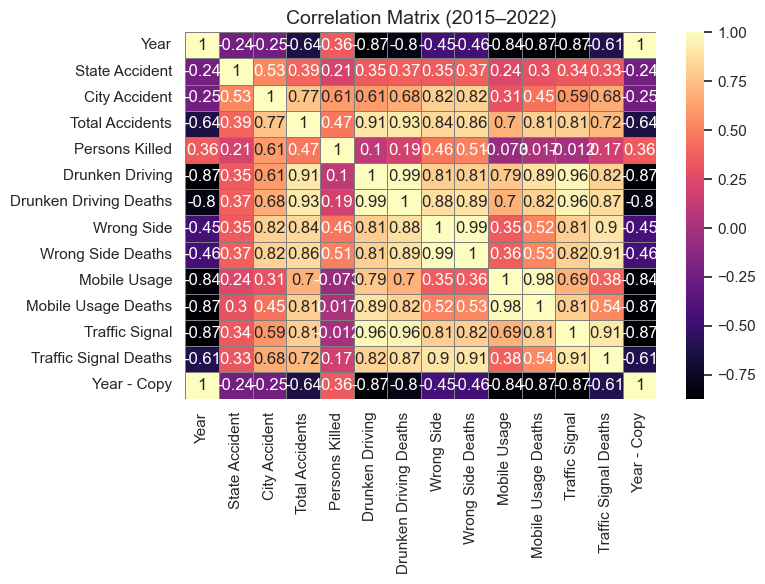

In [123]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:\n", corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix (2015–2022)", fontsize=14)
plt.tight_layout()
plt.show()


In [125]:
#Insight : The correlation matrix shows that total accidents are highly influenced by both state-level and city-level accidents, as these two have strong positive correlations with total accidents. Other factors like drunken driving, mobile usage, and traffic signal violations show weaker correlations, indicating that while they contribute to accidents, their impact may vary by location or other conditions.

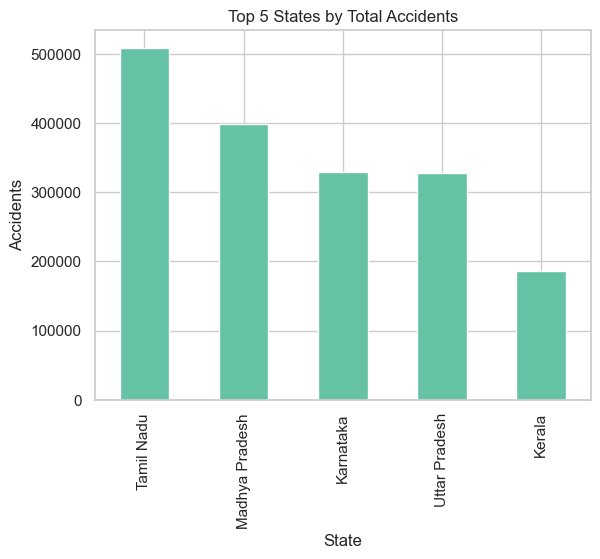

In [127]:
top_states = df.groupby("State")["State Accident"].sum().sort_values(ascending=False).head(5)
top_states.plot(kind="bar", title="Top 5 States by Total Accidents", ylabel="Accidents", xlabel="State")
plt.show()


In [129]:
 #Insight: This chart highlights the top 5 states with the highest number of reported accidents, indicating regions with critical road safety challenges and the need for targeted traffic regulations and enforcement.

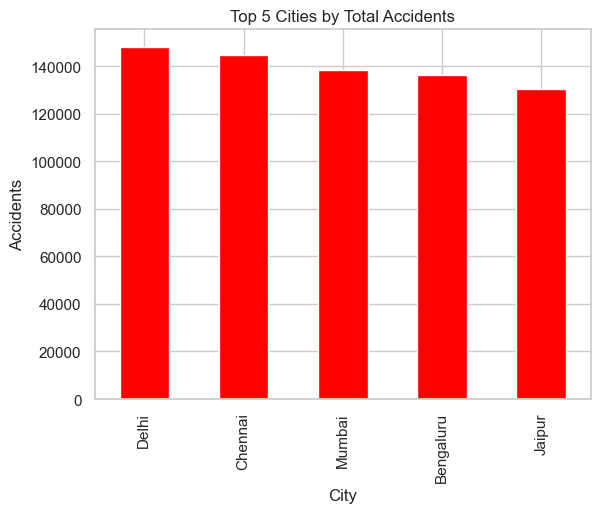

In [131]:
top_cities = df.groupby("City")["City Accident"].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind="bar", title="Top 5 Cities by Total Accidents", ylabel="Accidents", xlabel="City", color='Red')
plt.show()


In [133]:
#Insight: This bar chart reveals the top 5 cities with the highest number of total accidents. It highlights where urban accident concentrations are most severe, helping authorities prioritize city-specific safety interventions.

In [ ]:
sns.set_palette("magma")
sns.pairplot(df.select_dtypes(include='number'), corner=True)
plt.show()

In [ ]:
#Insight: This pairplot shows pairwise relationships between all numerical variables in the dataset using the "magma" color palette. Diagonal trends or clustering patterns indicate potential correlations. For example, if "City Accident" and "Persons Killed" show a rising diagonal, it suggests more city accidents often lead to higher fatalities. This visualization helps identify multicollinearity or interesting variable interactions for further modeling.

In [ ]:
accident_by_year = df.groupby('Year')['Total Accidents'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=accident_by_year, x='Year', y='Total Accidents', marker='o', color='blue')
plt.title('Total Accidents in India (2015–2022)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Insight: This line chart visualizes the trend of total accidents in India from 2015 to 2022. If the line increases, it indicates a rise in road accidents over the years. A declining trend shows improvement in road safety. Sharp dips or peaks could highlight the impact of specific events (e.g., COVID-19 lockdown in 2020 likely caused a drop).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



X = df[["City Accident"]]
y = df["State"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sample_data = df[['City Accident']].head()
predictions = model.predict(sample_data)

for i in range(len(sample_data)):
    print(f"City Accident: {sample_data.iloc[i, 0]} → Predicted State: {predictions[i]}")


In [ ]:
#Insight: Using only 'City Accident' as the input feature in the KNN model may not be enough for accurate state prediction, as different states can have cities with similar accident counts. This can lead to misclassification, especially when accident numbers are close. Adding more features like 'Drunken Driving', 'Wrong Side', or 'Mobile Usage' could improve prediction accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Clean column names
df.columns = df.columns.str.strip()

# Features and Target
X = df[['City Accident']]
y = df['State']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and Accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
#Insight: The model uses only 'City Accident' to predict the state, which limits its accuracy because many cities in different states can have similar accident counts, making it hard for the model to distinguish between them accurately.